In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/task_b.csv')
data=data.iloc[:,1:]

In [ ]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [ ]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [ ]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [ ]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn

Feature: 0, Score: -1481.82595
Feature: 1, Score: 14346.68384
Feature: 2, Score: 10505.38569


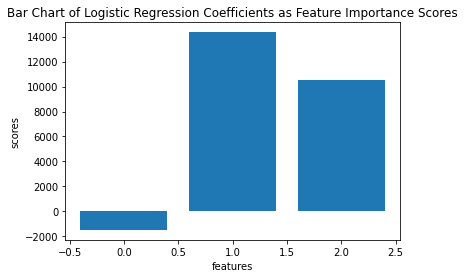

In [ ]:
model_logistic_regression = sklearn.linear_model.SGDClassifier(loss='log', random_state=0)
model_logistic_regression.fit(X, Y)

#importance = Weights assigned to the features.
importance = model_logistic_regression.coef_[0]

for i, v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Bar Chart of Logistic Regression Coefficients as Feature Importance Scores")
plt.xlabel("features")
plt.ylabel("scores")
plt.show()

**Task1:**
**1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance**

weight(Feature1) > weight(Feature2) > weiight(Feature0)
Feature1 is most important, then Feature2 and then Feature0 

Feature: 0, Score: -1481.82595
Feature: 1, Score: 14346.68384
Feature: 2, Score: 10505.38569


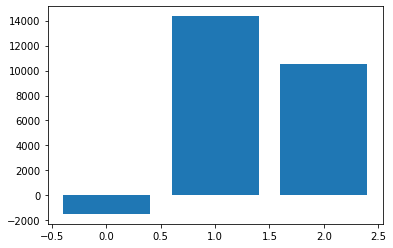

In [ ]:
model_svm = sklearn.linear_model.SGDClassifier(loss='hinge', random_state=0)
model_svm.fit(X, Y)

for i, v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Task1:**
**2. Apply SVM(SGDClassifier with hing loss) on 'data' and check the feature importance**

weight(feature1) > weight(feature2) > weight(feature0)
Feature1 is most important and then feature2 and then feature0 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X_scaled = scaled_data[['f1', 'f2', 'f3']].values
Y_scaled = scaled_data['y'].values

Feature: 0, Score: 1.67993
Feature: 1, Score: 0.45236
Feature: 2, Score: 9.61807


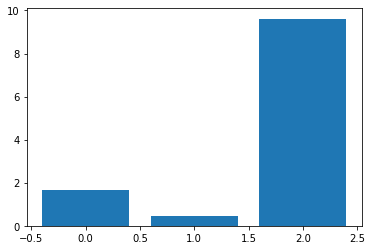

In [ ]:
model_logistic_regression = sklearn.linear_model.SGDClassifier(loss='log', random_state=0)
model_logistic_regression.fit(X_scaled, Y_scaled)

importance = model_logistic_regression.coef_[0]
#importance = Weights assigned to the features.

for i, v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Task2:**
**1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance**
    
weight(Feature2) > weight(Feature0) > weight(Feature1)
the most important feature after scale is Feature2 but before scale Feature1 was most important becasue values are in higher range before scale. 



Feature: 0, Score: 0.08724
Feature: 1, Score: 0.46596
Feature: 2, Score: 9.98070


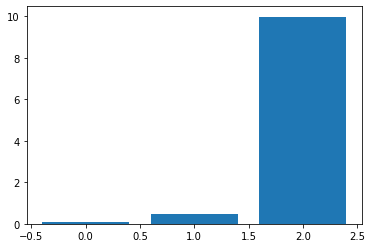

In [ ]:
model_svm = sklearn.linear_model.SGDClassifier(loss='hinge', random_state=0)
model_svm.fit(X_scaled, Y_scaled)
importance = model_svm.coef_[0]
for i, v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Task2: 2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance**

weight(Feature2) > weight(Feature1) > weight(Feature0) the most important feature after scale is Feature 2 but before scale Feature1 was most important

Higher the absolute value of a feature weight, more is its importance. 